# 激活函数

In [1]:
# 导入所需要的库
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pydot

## sigmoid

In [2]:
x = np.linspace(-10,10,1000)
y = tf.nn.sigmoid(x)

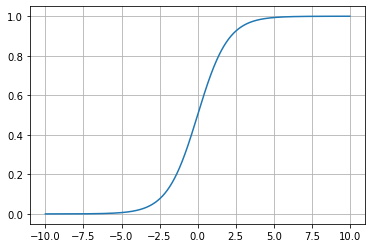

In [3]:
plt.plot(x,y)
plt.grid()

## tanh

In [4]:
x = np.linspace(-10,10,100)
y = tf.nn.tanh(x)

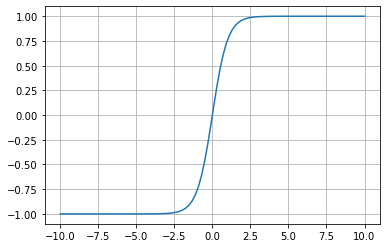

In [5]:
plt.plot(x,y)
plt.grid()

## relu

In [6]:
x = np.linspace(-10,10,100)
y = tf.nn.relu(x)

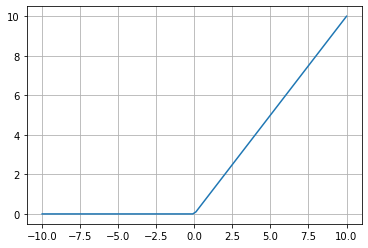

In [7]:
plt.plot(x,y)
plt.grid()

## leakyrelu

In [8]:
x = np.linspace(-10,10,100)
y = tf.nn.leaky_relu(x)

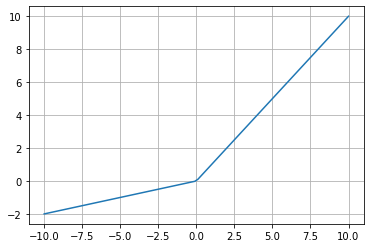

In [9]:
plt.plot(x,y)
plt.grid()

## softmax

In [10]:
x = tf.constant([0.2,0.02,0.15,1.3,0.5,0.06,1.1,0.05,3.75])
y = tf.nn.softmax(x)

In [11]:
y

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.02167152, 0.01810158, 0.02061459, 0.06510484, 0.02925349,
       0.01884031, 0.05330333, 0.01865285, 0.75445753], dtype=float32)>

# 参数初始化

In [12]:
import tensorflow as tf

## Xavizer初始化

In [13]:
# 正态分布的
# 实例化
initializer = tf.keras.initializers.glorot_normal()
values = initializer((9,1))

In [14]:
values

<tf.Tensor: shape=(9, 1), dtype=float32, numpy=
array([[-0.32692477],
       [-0.32924312],
       [ 0.673175  ],
       [-0.4799437 ],
       [-0.08098566],
       [ 0.4119584 ],
       [ 0.18610379],
       [-0.27745566],
       [-0.15676077]], dtype=float32)>

In [15]:
# 标准化：均匀分布
initializern = tf.keras.initializers.glorot_uniform()
values = initializern((9,1))

In [16]:
values

<tf.Tensor: shape=(9, 1), dtype=float32, numpy=
array([[ 0.4448254 ],
       [ 0.7419572 ],
       [ 0.6351299 ],
       [-0.11663854],
       [ 0.13071436],
       [-0.5258107 ],
       [-0.49979952],
       [ 0.7691004 ],
       [-0.6596336 ]], dtype=float32)>

## He初始化

In [17]:
# 正态分布
# 实例化
initializer = tf.keras.initializers.he_normal()
# 采样得到权重
values = initializer((9,1))

In [18]:
values

<tf.Tensor: shape=(9, 1), dtype=float32, numpy=
array([[-0.44068944],
       [-0.91825926],
       [ 0.16136809],
       [ 0.5325968 ],
       [ 0.00195599],
       [-0.22049876],
       [-0.2874862 ],
       [ 0.1461078 ],
       [-0.8206885 ]], dtype=float32)>

In [19]:
# 标准化：均匀分布
initializer = tf.keras.initializers.he_uniform()
values = initializer((9,1))

In [20]:
values

<tf.Tensor: shape=(9, 1), dtype=float32, numpy=
array([[ 0.70287514],
       [ 0.12996244],
       [-0.49692968],
       [-0.40356264],
       [ 0.38760626],
       [ 0.18381858],
       [ 0.3547349 ],
       [ 0.69428015],
       [-0.5674746 ]], dtype=float32)>

# 神经网络的搭建

## sequential方式

In [21]:
# 导入工具包
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

In [31]:
# 定义model,构建模型
model = keras.Sequential([
    # 第一个隐层
    layers.Dense(3, activation="relu", kernel_initializer="he_normal", name="layer1",input_shape=(3,)),
    # 第二个隐层
    layers.Dense(2, activation="relu",
                 kernel_initializer="he_normal", name="layer2"),
    # 输出层
    layers.Dense(2, activation="sigmoid",
                 kernel_initializer="he_normal", name="layer3")
    ],
    name="sequential"
)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 3)                 12        
_________________________________________________________________
layer2 (Dense)               (None, 2)                 8         
_________________________________________________________________
layer3 (Dense)               (None, 2)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


## 利用functional API构建模型

In [33]:
# 定义模型的输入
inputs = keras.Input(shape=(3,), name='input')
# 第一个隐层
x = layers.Dense(3, activation="relu", name="layer1")(inputs)
# 第二个隐层
x = layers.Dense(2, activation="relu", name="layer2")(x)
# 输出层
outputs = layers.Dense(2, activation="sigmoid", name="output")(x)
# 创建模型
model = keras.Model(inputs=inputs, outputs=outputs,
                    name="Functional API Model")

In [34]:
model.summary()

Model: "Functional API Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3)]               0         
_________________________________________________________________
layer1 (Dense)               (None, 3)                 12        
_________________________________________________________________
layer2 (Dense)               (None, 2)                 8         
_________________________________________________________________
output (Dense)               (None, 2)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


##  通过model子类构建模型

In [35]:
# 定义一个model的子类
class MyModel(keras.Model):
    # 定义网络的层结构
    def __init__(self):
        super(MyModel,self).__init__()
        # 第一层隐层
        self.layer1 = layers.Dense(3,activation="relu",name="layer1")
        # 第二个隐层
        self.layer2 = layers.Dense(2,activation="relu",name="layer2")
        # 输出层
        self.layer3 = layers.Dense(2,activation="sigmoid",name = "layer3")
    # 定义网络的前向传播
    def call(self,inputs):
        x = self.layer1(inputs)
        x = self.layer2(x)
        outputs = self.layer3(x)
        return outputs

In [36]:
# 实例化moxing
model = MyModel()
# 设置输入
x = tf.ones((1,3))
y = model(x)

In [37]:
y

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.5009231, 0.5421531]], dtype=float32)>

In [38]:
model.summary()

Model: "my_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               multiple                  12        
_________________________________________________________________
layer2 (Dense)               multiple                  8         
_________________________________________________________________
layer3 (Dense)               multiple                  6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


# 损失函数

## 交叉熵损失

In [ ]:
import tensorflow as tf

In [16]:
# 设置真实值和预测值
y_true = [[0,1,0],[0,0,1]]
y_pre = [[0.05,0.9,0.05],[0.05,0.05,0.9]]
# 实例化交叉熵损失
cce = tf.keras.losses.CategoricalCrossentropy()
# 计算损失结果
cce(y_true,y_pre)

<tf.Tensor: shape=(), dtype=float32, numpy=0.105360545>

## 二分类的交叉熵损失函数

In [17]:
# 设置真实值和预测值
y_true = [[0],[1]]
y_pre = [[0.1],[0.9]]
# 实例化
bce = tf.keras.losses.BinaryCrossentropy()
# 计算损失函数
bce(y_true,y_pre)

<tf.Tensor: shape=(), dtype=float32, numpy=0.10536041>

## MAE(L1 LOSS)

In [53]:
# 设置真实值和预测值
y_true = [[0.],[1.]]
y_pre = [[0.],[1.]]
# 实例化MAE损失
mae = tf.keras.losses.MeanAbsoluteError()
mae(y_true,y_pre)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

## MSE(L2 loss)

In [56]:
# 设置真实值和预测值
y_true = [[0.],[1.]]
y_pre = [[0.],[1.]]
# 实例化MSE
mse = tf.keras.losses.MeanSquaredError()
mse(y_true,y_pre)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

## smoothL1

In [18]:
# 设置真实值和预测值
y_true = [[0.],[1.]]
y_pre = [[0.2],[0.6]]
# 实例化损失
smooth = tf.keras.losses.Huber()
smooth(y_true,y_pre)

<tf.Tensor: shape=(), dtype=float32, numpy=0.049999997>